**Description:** This is the Jupyter notebook is used to play a business case based King County real estate data. We want to predict the price for properties in King County Washington USA. The data was given by neuefische, but you can find it in the Kaggle Challange here: https://www.kaggle.com/harlfoxem/housesalesprediction 

**Project Name:** House price predictions King County

**Author:** Silas Mederer

**Date:** 2020-09-04

# Regression

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
import statsmodels.api as sms
import statsmodels.formula.api as smf

%matplotlib inline

from scipy import stats

In [26]:
df = pd.read_csv("data/df_clean.csv")

In [27]:
# drop columns
df.drop("Unnamed: 0", inplace=True, axis=1)
df.drop("date", inplace=True, axis=1)

In [28]:
round(df.describe(),2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_l_price
count,21597.00,21595.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,285.72,1971.00,143902.70,98077.95,47.56,-122.21,1986.62,12758.28,264.14
std,367368.14,0.90,0.77,918.11,41412.64,0.54,0.08,0.76,0.65,1.17,827.76,439.82,29.38,4436.65,53.51,0.14,0.14,685.23,27274.44,110.00
min,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,0.00,1900.00,140502.00,98001.00,47.16,-122.52,399.00,651.00,87.59
25%,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,140722.00,98033.00,47.47,-122.33,1490.00,5100.00,182.29
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,141016.00,98065.00,47.57,-122.23,1840.00,7620.00,244.64
75%,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,550.00,1997.00,150217.00,98118.00,47.68,-122.12,2360.00,10083.00,318.33
max,7700000.00,10.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,150527.00,98199.00,47.78,-121.32,6210.00,871200.00,810.14


## Categorise and edit features

A few of the features need to be preprocessed so we will create dummies for all categorial features ["waterfront", "condition", "grade", "zipcode", 'bedrooms', 'bathrooms', 'floors', 'view'] afterwards we log() the label “price” as “price_log” to use it as target.

In [29]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sqft_l_price'],
      dtype='object')

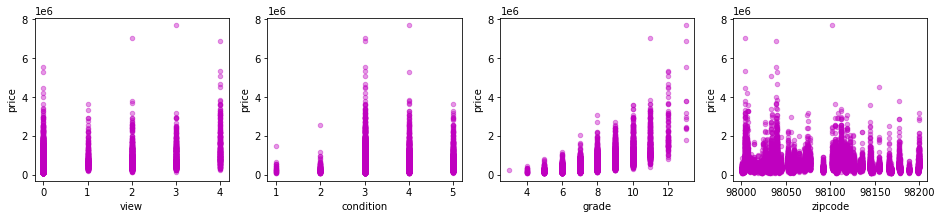

In [30]:
#categorial features1
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['view', 'condition', 'grade', 'zipcode'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='m')
    
plt.savefig('figures/categorial-features1.png')

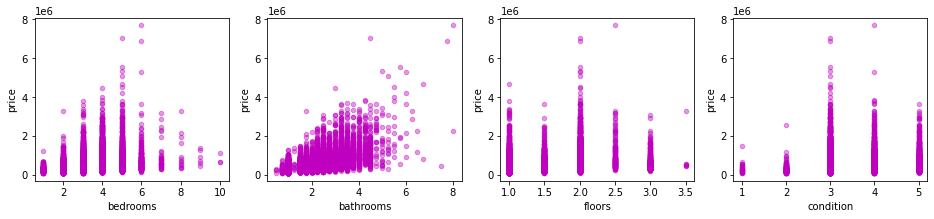

In [31]:
#categorial features2
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'floors', 'condition'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='m')
    
plt.savefig('figures/categorial-features2.png')

In [32]:
categorical_var = ["waterfront",
                   "condition",
                   "grade",
                   "zipcode",
                   'bedrooms',
                   'bathrooms',
                   'floors',
                   'view']

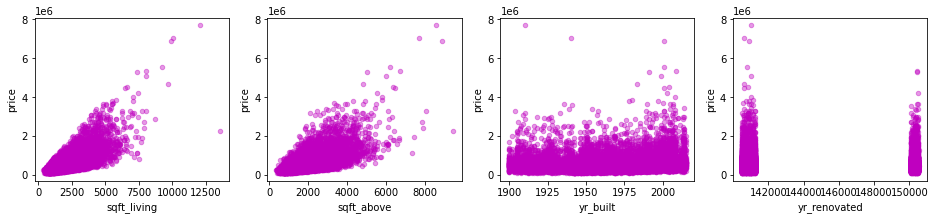

In [33]:
#contineus var1
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['sqft_living', 'sqft_above', 'yr_built', 'yr_renovated'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='m')
    
plt.savefig('figures/continues-feature1.png')

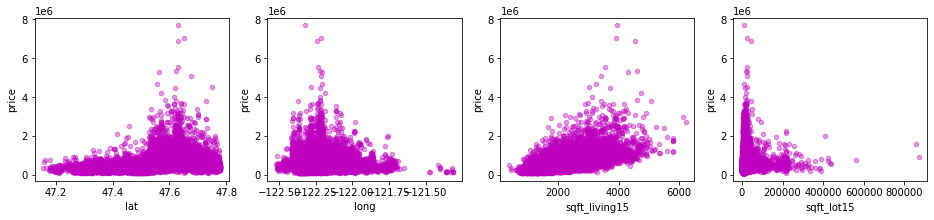

In [34]:
#contineus var2
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['lat', 'long', 'sqft_living15', 'sqft_lot15'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='m')
    
plt.savefig('figures/continues-feature2.png')

In [35]:
continuous_var = ['price',
                  'sqft_living',
                  'sqft_lot',
                  'sqft_above',
                  'sqft_basement',
                  'yr_built',
                  'yr_renovated',
                  'lat',
                  'long',
                  'sqft_living15',
                  'sqft_lot15',
                  "sqft_l_price",
                  "price_log"]

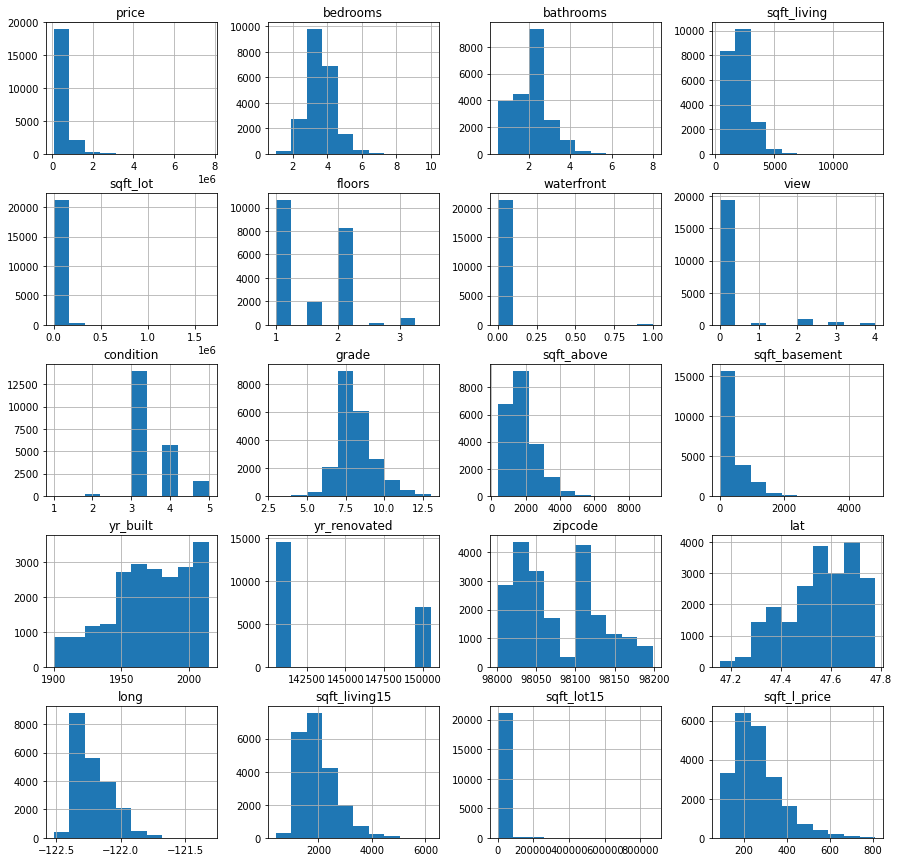

In [36]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df.hist(ax = ax);

In [37]:
df["price_log"]=np.log(df.price)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_l_price,price_log
0,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,...,0.0,1955,141013,98178,47.5112,-122.257,1340,5650,188.05,12.309982
1,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,...,400.0,1951,141209,98125,47.7210,-122.319,1690,7639,209.34,13.195614
2,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,...,0.0,1933,150225,98028,47.7379,-122.233,2720,8062,233.77,12.100712
3,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,...,910.0,1965,141209,98136,47.5208,-122.393,1360,5000,308.16,13.311329
4,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,...,0.0,1987,150218,98074,47.6168,-122.045,1800,7503,303.57,13.142166


## Correlogram

Now we check for correlations between the features. We want to identify auto-correlations to avoid data leakage.

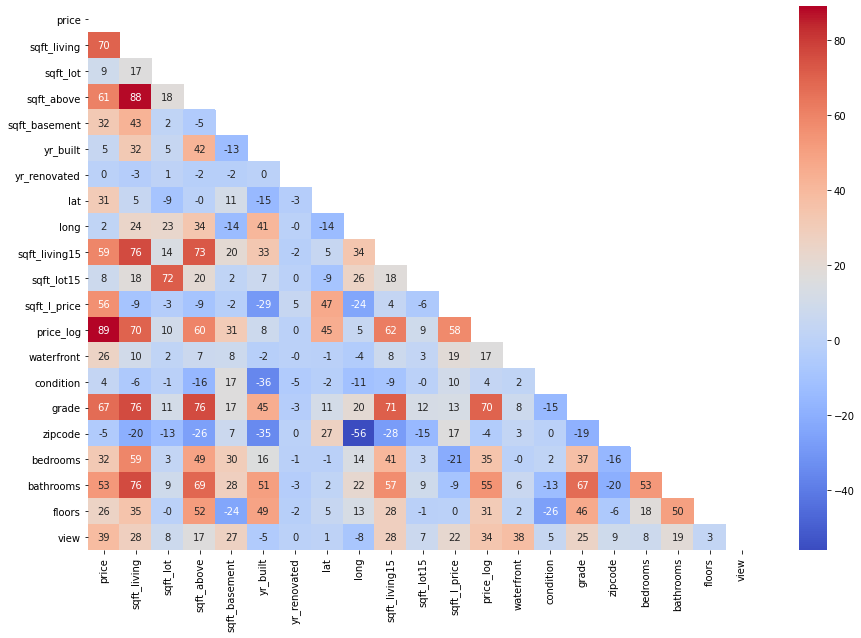

In [38]:
fig, ax = plt.subplots(figsize=(15,10))


df_dum = pd.get_dummies(df[continuous_var+categorical_var].copy())
mask = np.triu(df_dum.corr())
ax = sns.heatmap(round(df_dum.corr()*100,0)
                 ,annot=True
                 ,mask=mask
                 ,cmap="coolwarm")
                 
plt.savefig('figures/correlogram.png')

**Conclusion:** We can find strong correlations (red coloured) betrween sqft_l_price, price_log and price, that is obvious since all have the same base and are results of operations on the price feature. Also, we can find high values 70 to sqft_living, 61 to sqft_above, 59 sqft_living, 67 grade and 53 bathrooms. But the features sqft_basement, lat, waterfront, bedrooms, floors and view - all around 30 are also positiv correlated. It is noticeable, that there are no negative correlations between the label price and all the features.

## Get dummies

Here we create the dummies for the identified categorial variables/features.

In [39]:
categorical_var

['waterfront',
 'condition',
 'grade',
 'zipcode',
 'bedrooms',
 'bathrooms',
 'floors',
 'view']

In [40]:
df[categorical_var] = df[categorical_var].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  object 
 2   bathrooms      21597 non-null  object 
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  object 
 6   waterfront     21597 non-null  object 
 7   view           21597 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  int64  
 14  zipcode        21597 non-null  object 
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [41]:
X = pd.get_dummies(df.copy(), drop_first=True)

X.drop("price",            axis=1, inplace=True)
X.drop("price_log",        axis=1, inplace=True)
X.drop("sqft_l_price",     axis=1, inplace=True)

y = df["price"]
y_loc = df["price_log"]

In [42]:
y_loc.head()

0    12.309982
1    13.195614
2    12.100712
3    13.311329
4    13.142166
Name: price_log, dtype: float64

## Linear regression model

We start the modeling different regressions. First we try a sklearn LinearRegression() on the price label. Next step is a tuning with Lasso() and a little hyperparameter tuning of alpha. The last step was to model the regression on the label price_log and just cause we can we use another module statsmodel to do the OLS.

### Sklearn LinearRegression on price label

In [43]:
from sklearn.model_selection import train_test_split
# price
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_predictions = lin_reg.predict(X_test)

#### RMSE, R2, MAE

In [45]:
print(f"RMSE: {round(mean_squared_error(y_test, y_predictions)**0.5,3)}")
print(f"R2:       {round(r2_score(y_test, y_predictions)*100,3)}%")
print(f"MAE:   {round(mean_absolute_error(y_test, y_predictions))} Dollar")

RMSE: 138170.908
R2:       83.782%
MAE:   85593.0 Dollar


- **R2:** What we can see is that the proportion of the variance in the dependent variable (label = "price") that is predictable from the independent variables (features) lies by 83,78%. This is pretty good, usually this score shouldn´t lie above 95% if so the model is overfitted or the data is biased.
- **RMSE:** It indicates by how much, on average, the estimate deviates from the measurement. The RMSE should always be considered in conjunction with the data itself. So you can find a plot of the risiduen in the plots below. The root mean squared error (RMSE) should be as low as possible the optimum is 0 but this is as a high R2 not usual in real world data.
- **MAE:** This error shows the average of the absolute errors so the distance between our predictions and the real values. This error could be translated with Dollar, the mean amount of Dollar we missed (absoult) with the prediction.

#### Coefficients

In [46]:
co = pd.DataFrame(lin_reg.coef_, X.columns)
co.columns = ["Coefficents"]
co.round(2).head(10)

,Coefficents
sqft_living,109.21
sqft_lot,0.21
sqft_above,47.40
sqft_basement,4.78
yr_built,-322.18
yr_renovated,3.24
lat,196077.56
long,-221712.14
sqft_living15,19.51
sqft_lot15,-0.19


**Explanation:** If a coefficent increases by one the price of the propertie will be increased by the value.

#### Visualisations

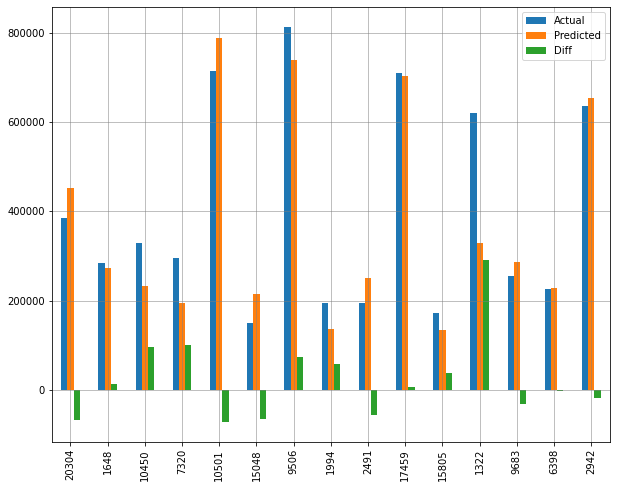

In [47]:
# create dataframe with actual and predicted values to plot
test_df = pd.DataFrame({"Actual": y_test, "Predicted": y_predictions})
test_df["Diff"] = test_df.Actual - test_df.Predicted
test_df = test_df.round().sample(15)
test_df

# and plot
test_df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

**Explanation:** You can see the actual price (blue), the prediction (orange) and the differences (green). Also in the x-axis you can see the propertie (row number).

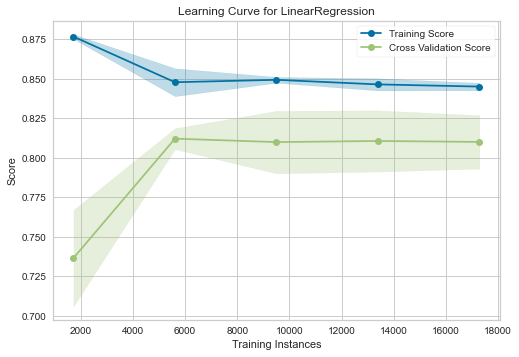

In [48]:
from yellowbrick.model_selection import LearningCurve

model = LinearRegression()
visualizer = LearningCurve(model, scoring='r2')

visualizer.fit(X, y)
visualizer.show();

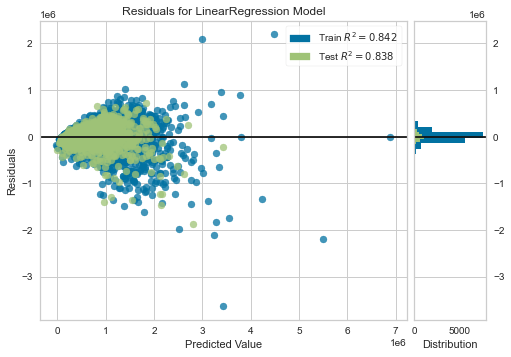

In [49]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

### Lasso Regression  on price label

In [50]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [51]:
lasso = Lasso(alpha=200)

# price
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

# looking for the right parameter
parameters = {"alpha": [50,100,200,500,1000]} #1st try
parameters = {"alpha": [200,250]}             #2nd try
parameters = {"alpha": [200,210,220]}         #3rd try
parameters = {"alpha": [200]}                 #used

# grid search
#lasso_regressor = GridSearchCV(lasso, parameters, scoring="neg_mean_squared_error", cv=5)

In [52]:
lasso.fit(X_train, y_train)
y_predictions_lasso = lasso.predict(X_test)

#### RMSE, R2, MAE

In [60]:
print(f"LassoReg RMSE: {np.round(mean_squared_error(y_test, y_predictions_lasso)**.5,2)}")
print(f"LassoReg R2:       {round(r2_score(y_test, y_predictions_lasso),3)*100} %")  
print(f"Lasso MAE:      {round(mean_absolute_error(y_test, y_predictions))} Dollar")

LassoReg RMSE: 138579.65
LassoReg R2:       83.7 %
Lasso MAE:      85593.0 Dollar


- The training and tuning of a Lasso Regression was not helpfull. Both scores had been better by the usual LinearRegression() model.

#### Coefficients

In [54]:
co = pd.DataFrame(lasso.coef_, X.columns)
co.columns = ["Coefficents"]
co.round(2).head(10)

,Coefficents
sqft_living,138.47
sqft_lot,0.19
sqft_above,44.54
sqft_basement,5.43
yr_built,-416.14
yr_renovated,3.15
lat,560817.49
long,-0.00
sqft_living15,21.18
sqft_lot15,-0.22


**Explanation:** If a coefficent increases by one the price of the propertie will be increased by the value.

#### Visualisations

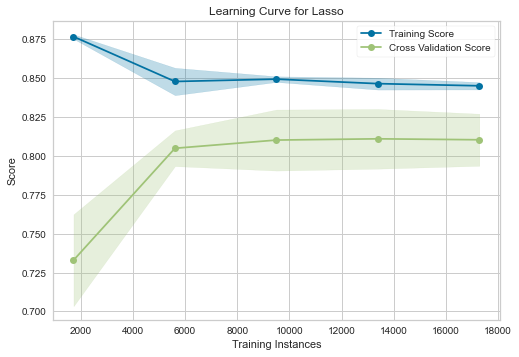

In [55]:
from yellowbrick.model_selection import LearningCurve

model = Lasso()
visualizer = LearningCurve(model, scoring='r2')

visualizer.fit(X, y)
visualizer.show();

### Sklearn LinearRegression on price_loc label

In [56]:
# split
X_train, X_test, y_train, y_test = train_test_split(X,y_loc, test_size = 0.2, random_state = 0)

# train
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# test
y_train_predict = lin_reg.predict(X_train)
y_test_predict = lin_reg.predict(X_test)

# re transforming
y_train_predict = np.exp(y_train_predict)
y_train = np.exp(y_train)
y_test_predict = np.exp(y_test_predict)
y_test = np.exp(y_test)

#### RMSE, R2

In [57]:
# metrics
RMSE_train = np.round(mean_squared_error(y_train, y_train_predict)**0.5,2)
RMSE_test = np.round(mean_squared_error(y_test, y_test_predict)**0.5,2)

R2_train = np.round(r2_score(y_train, y_train_predict),2)
R2_test = np.round(r2_score(y_test, y_test_predict),2)

# output
print(f"R2-Score for Training Set is: {R2_train*100}%")
print(f"R2-Score for Test Set is:     {R2_test*100}%")
print(f"RMSE for Training Set is: {RMSE_train}")
print(f"RMSE for Test Set is:     {RMSE_test}")

R2-Score for Training Set is: 87.0%
R2-Score for Test Set is:     88.0%
RMSE for Training Set is: 133074.62
RMSE for Test Set is:     116942.21


- Targeting the "price_loc" label was a good idea. We can increase the R2 up to 88% on the test set, so our model can predict 88% of the "price_loc" variance. That is a very good score. 
- Also the RSME decreased. As I said already there is no target value range, it should be as low as possible 0 would be the perfect model.

#### Visualisations

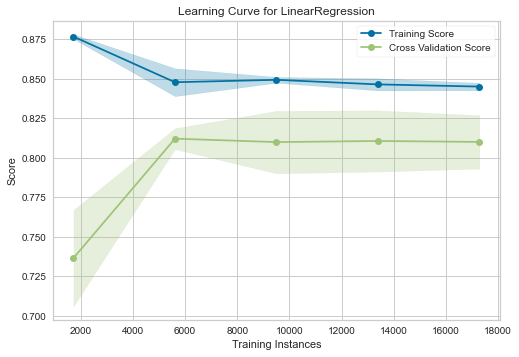

In [39]:
#visual
model = LinearRegression()
visualizer = LearningCurve(model, scoring='r2')
visualizer.fit(X, y)
visualizer.show();

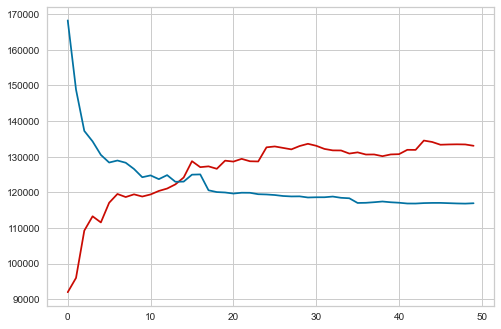

In [35]:
# learning curve function
def plot_learning_curves(model,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
    train_errors, test_errors = [],[]
    training_sizes = np.linspace(len(X_train)/50, len(X_train), num = 50)
    training_sizes = training_sizes.astype(int)
    for m in training_sizes:
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = np.exp(model.predict(X_train[:m]))
        y_test_predict = np.exp(model.predict(X_test))
        train_errors.append(mean_squared_error(y_train_predict, np.exp(y_train[:m])))
        test_errors.append(mean_squared_error(y_test_predict, np.exp(y_test)))
    plt.plot(np.sqrt(train_errors), "r-", label = "Training Set")
    plt.plot(np.sqrt(test_errors), "b-", label = "Test Set")  

plot_learning_curves(lin_reg, X,y_loc)

### Statsmodel OLS on price_loc label

In [36]:
# split
X_train, X_test, y_train, y_test = train_test_split(X,y_loc, test_size = 0.2, random_state = 0)

# add constant important for this model
X_train = sms.add_constant(X_train)

model = sms.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     934.4
Date:                Sat, 17 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:12:20   Log-Likelihood:                 5124.2
No. Observations:               17277   AIC:                            -9966.
Df Residuals:                   17136   BIC:                            -8873.
Df Model:                         140                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -61.8809      7.729     -8.006      0.000     -77.031     -46.730
sqft_living        0.0001   1.76e-05      7.781      0.000       0.000       0.000
sqft_lot        6.219e-07   4.94e-08     12.580      0.000    5.25e-07    7.19e-07
sqft_above       7.95e-05   1.77e-05      4.483      0.000    4.47e-05       0.000
sqft_basement  -6.798e-08   1.74e-05     -0.004      0.997   -3.43e-05    3.41e-05
yr_built          -0.0008   8.46e-05     -9.775      0.000      -0.001      -0.001
yr_renovated    5.635e-06   3.12e-07     18.058      0.000    5.02e-06    6.25e-06
lat                0.5222      0.079      6.587      0.000       0.367       0.678
long              -0.4059      0.057     -7.072      0.000      -0.518      -0.293
sqft_living15   7.249e-05    3.7e-06     19.615      0.000    6.52e-05    7.97e-05
sqft_lot15      7.958e-08   7.52e-08      1.058      0.290   -6.79e-08    2.27e-07
bedrooms_10.0     -0.1704      0.108     -1.584      0.113      -0.381       0.040
bedrooms_2.0       0.0287      0.016      1.809      0.070      -0.002       0.060
bedrooms_3.0       0.0464      0.016      2.923      0.003       0.015       0.078
bedrooms_4.0       0.0473      0.016      2.918      0.004       0.016       0.079
bedrooms_5.0       0.0167      0.017      0.977      0.329      -0.017       0.050
bedrooms_6.0      -0.0091      0.020     -0.446      0.656      -0.049       0.031
bedrooms_7.0      -0.1352      0.038     -3.579      0.000      -0.209      -0.061
bedrooms_8.0      -0.0543      0.058     -0.930      0.353      -0.169       0.060
bedrooms_9.0      -0.0386      0.093     -0.415      0.678      -0.221       0.144
bedrooms_nan       0.1681      0.182      0.926      0.355      -0.188       0.524
bathrooms_0.75     0.1972      0.094      2.094      0.036       0.013       0.382
bathrooms_1.0      0.1902      0.091      2.099      0.036       0.013       0.368
bathrooms_1.25     0.2266      0.111      2.041      0.041       0.009       0.444
bathrooms_1.5      0.2120      0.091      2.336      0.020       0.034       0.390
bathrooms_1.75     0.2484      0.091      2.738      0.006       0.071       0.426
bathrooms_2.0      0.2447      0.091      2.697      0.007       0.067       0.423
bathrooms_2.25     0.2738      0.091      3.016      0.003       0.096       0.452
bathrooms_2.5      0.2836      0.091      3.125      0.002       0.106       0.461
bathrooms_2.75     0.2946      0.091      3.241      0.001       0.116       0.473
bathrooms_3.0      0.2930      0.091      3.219      0.001       0.115       0.471
bathrooms_3.25     0.3172      0.091      3.479      0.001       0.139       0.496
bathrooms_3.5      0.3104      0.091      3.406      0.001       0.132       0.489
bathrooms_3.75     0.3353      0.092      3.633      0.000       0.154       0.516
bathrooms_4.

# Conclusions
All in all, we have been very successful in predicting the price. In the best model we achieved an R2 score of 88%. That is a very good value. In the summary of the OLS you can also see how each feature changes the price. As a reading aid, if all other variables remain constant, the price will change by the value shown in the coefficients column when the feature increases by 1. Remember that the values are logarithmic. Here are the best scores again, also you can find the coefficents for the OLS from sklearn.

In [37]:
print(f"R2-Score for Training Set is: {R2_train*100}%")
print(f"R2-Score for Test Set is:     {R2_test*100}%")
print(f"RMSE for Training Set is: {RMSE_train}")
print(f"RMSE for Test Set is:     {RMSE_test}")

R2-Score for Training Set is: 87.0%
R2-Score for Test Set is:     88.0%
RMSE for Training Set is: 133074.62
RMSE for Test Set is:     116942.21


Even the basemodel without the loged price was good. Here is the plot again:

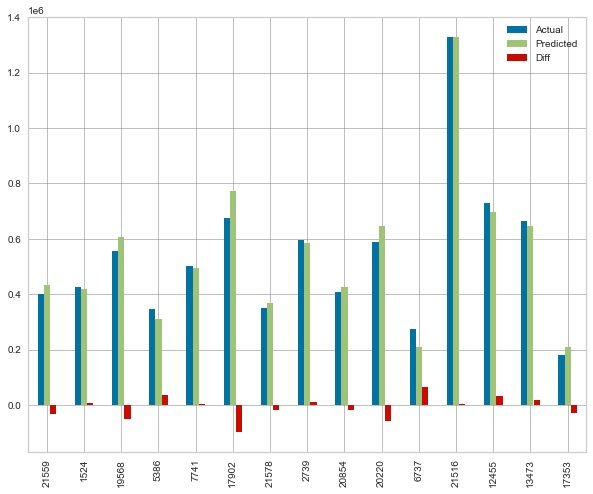

In [64]:
# create dataframe with actual and predicted values to plot
test_df = pd.DataFrame({"Actual": y_test, "Predicted": y_predictions})
test_df["Diff"] = test_df.Actual - test_df.Predicted
test_df = test_df.round().sample(15)
test_df

# and plot
test_df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()